In [4]:
import tensorflow as tf
# Import TensorFlow, which is a library for building and training machine learning models.

from tensorflow import keras
# Import Keras from TensorFlow, which provides high-level APIs for building and training neural networks.

from tensorflow.keras import layers
# Import layers module from Keras, which contains various types of layers used in building neural networks.

from tensorflow.keras.datasets import cifar10
# Import CIFAR-10 dataset loader from Keras. CIFAR-10 is a dataset of 60,000 32x32 color images in 10 classes.

from tensorflow.keras.utils import to_categorical
# Import to_categorical utility from Keras for converting class vectors to binary class matrices.

import numpy as np
# Import NumPy, which is a library for numerical operations in Python and is often used for handling arrays and matrices.


In [5]:
# Load CIFAR-10 dataset
# CIFAR-10 is a dataset of 60,000 32x32 color images in 10 classes, with 6,000 images per class.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 66s 0us/step


In [6]:
# Display the shapes of the training and test datasets
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [15]:
# Creating a dummy array of shape (2, 2, 2, 3)
array = np.array([[[[255, 0, 0], [0, 255, 0]],  # First image
                   [[0, 0, 255], [255, 255, 0]]],

                  [[[255, 0, 255], [0, 255, 255]],  # Second image
                   [[255, 255, 255], [0, 0, 0]]]])

print("Array shape:", array.shape)
print(array)


Array shape: (2, 2, 2, 3)
[[[[255   0   0]
   [  0 255   0]]

  [[  0   0 255]
   [255 255   0]]]


 [[[255   0 255]
   [  0 255 255]]

  [[255 255 255]
   [  0   0   0]]]]


In [7]:
# Display the first image in the training set and its corresponding label
import matplotlib.pyplot as plt

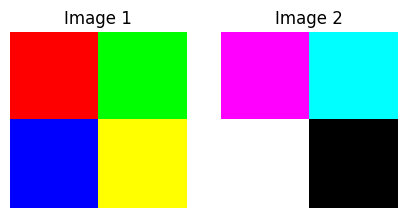

In [16]:
# Visualizing the two images
fig, axes = plt.subplots(1, 2, figsize=(5, 5))

axes[0].imshow(array[0])  # First image
axes[0].set_title("Image 1")
axes[0].axis('off')  # Hide axes

axes[1].imshow(array[1])  # Second image
axes[1].set_title("Image 2")
axes[1].axis('off')  # Hide axes

plt.show()

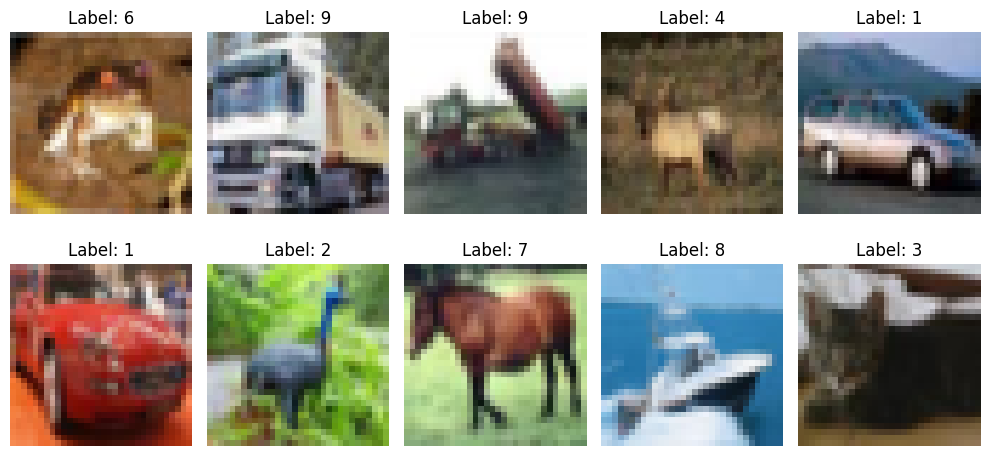

In [12]:
# Display some images from the dataset
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i])
    ax.set_title(f'Label: {y_train[i][0]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [13]:
# Print pixel values of the first image
print(f"Pixel values of the first image:\n{x_train[0]}")

Pixel values of the first image:
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


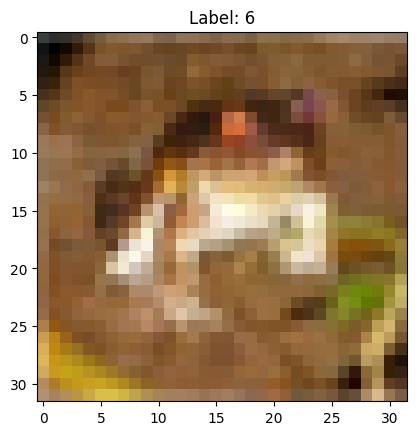

Shape of the first image: (32, 32, 3)
Pixel values of the top-left corner (first 5x5 pixels):
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  [ 68  54  42]
  [ 98  73  52]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  [ 51  27   8]
  [ 88  51  21]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  [ 83  50  23]
  [110  72  41]]

 [[ 33  25  17]
  [ 38  20   4]
  [ 87  54  25]
  [106  63  28]
  [115  70  33]]

 [[ 50  32  21]
  [ 59  32  11]
  [102  65  34]
  [127  79  39]
  [124  77  36]]]


In [14]:
# Select the first image in the training set
image = x_train[0]
label = y_train[0][0]

# Display the image
plt.imshow(image)
plt.title(f"Label: {label}")
plt.show()

# Display the shape of this single image
print(f"Shape of the first image: {image.shape}")

# Print the pixel values of the top-left corner (first 5 rows and columns)
print("Pixel values of the top-left corner (first 5x5 pixels):")
print(image[:5, :5, :])
